<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/DC_Motor_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=bbf0b7c84462a40ded28116afea46363d1e304a5e9d675a6bc7865a1a6007a48
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


5.156215435963724
2.944886841347907


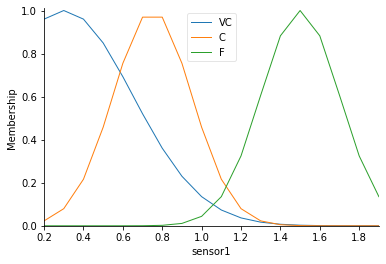

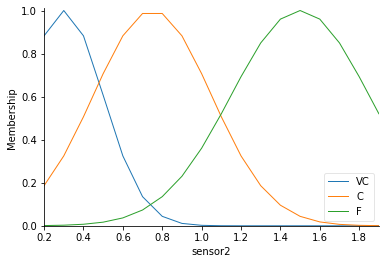

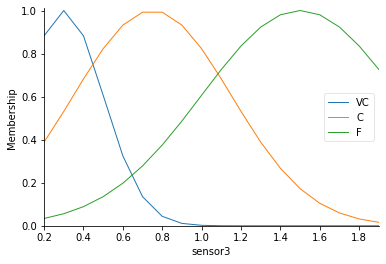

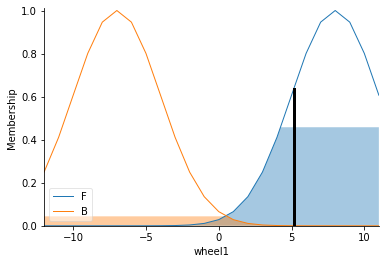

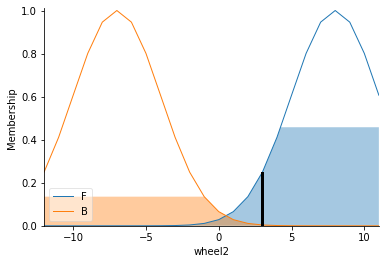

In [32]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input for camera

universe = np.arange(0.2, 2, 0.1) # 0.2 --> 2 meters
universe1 = np.arange(-12, 12, 1) # 0 --> 12V 
sensor1 = ctrl.Antecedent(universe, 'sensor1')
sensor2 = ctrl.Antecedent(universe, 'sensor2')
sensor3 = ctrl.Antecedent(universe, 'sensor3')
#output
wheel1 = ctrl.Consequent(universe1, 'wheel1')
wheel2 = ctrl.Consequent(universe1, 'wheel2')

#------------------#
sensor1['VC'] = fuzz.gaussmf(sensor1.universe, 0.3, 0.35)
sensor1['C'] = fuzz.gaussmf(sensor1.universe, 0.75, 0.2)
sensor1['F'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.2)
#------------------#
sensor2['VC'] = fuzz.gaussmf(sensor2.universe, 0.3, 0.2)
sensor2['C'] = fuzz.gaussmf(sensor2.universe, 0.75, 0.3)
sensor2['F'] = fuzz.gaussmf(sensor2.universe, 1.5, 0.35)
#------------------#
sensor3['VC'] = fuzz.gaussmf(sensor3.universe, 0.3, 0.2)
sensor3['C'] = fuzz.gaussmf(sensor3.universe, 0.75, 0.4)
sensor3['F'] = fuzz.gaussmf(sensor3.universe, 1.5, 0.5)
#------------------#
wheel1['F'] = fuzz.gaussmf(wheel1.universe, 8, 3) #Front
wheel1['B'] = fuzz.gaussmf(wheel1.universe, -7, 3) #Back

#------------------#
wheel2['F'] = fuzz.gaussmf(wheel2.universe, 8, 3)
wheel2['B'] = fuzz.gaussmf(wheel2.universe, -7, 3)



rule0 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['C'] & sensor3['VC']) | (sensor1['VC'] & sensor2['C'] & sensor3['C']) | (sensor1['VC'] & sensor2['F'] & sensor3['VC']) | (sensor1['VC'] & sensor2['F'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['F'] & sensor3['F']) | (sensor1['C'] & sensor2['C'] & sensor3['VC'])
 | (sensor1['C'] & sensor2['C'] & sensor3['C']) | (sensor1['C'] & sensor2['C'] & sensor3['F'])
 | (sensor1['C'] & sensor2['F'] & sensor3['VC']) | (sensor1['C'] & sensor2['F'] & sensor3['C'])
 | (sensor1['C'] & sensor2['F'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['VC'])
 | (sensor1['F'] & sensor2['F'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['F'])),consequent = wheel1['F'],label= 'rule Forward')


rule1 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['VC'] & sensor3['VC']) | (sensor1['VC'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['VC'] & sensor3['F']) | (sensor1['VC'] & sensor2['C'] & sensor3['F']) 
 | (sensor1['F'] & sensor2['VC'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['F'])),consequent = wheel1['F'],label= 'rule Spin right')


rule2 = ctrl.Rule(antecedent=((sensor1['C'] & sensor2['VC'] & sensor3['VC']) | (sensor1['C'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['C'] & sensor2['VC'] & sensor3['F'])),consequent = wheel1['B'], label= 'rule Backward')


rule3 = ctrl.Rule(antecedent=((sensor1['F'] & sensor2['VC'] & sensor3['VC']) | (sensor1['F'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['F'] & sensor2['C'] & sensor3['VC'])),consequent = wheel1['B'], label= 'rule Spin right')
#----------------------------------------------------------------------------------------------------#
rule4 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['C'] & sensor3['VC']) | (sensor1['VC'] & sensor2['C'] & sensor3['C']) | (sensor1['VC'] & sensor2['F'] & sensor3['VC']) | (sensor1['VC'] & sensor2['F'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['F'] & sensor3['F']) | (sensor1['C'] & sensor2['C'] & sensor3['VC'])
 | (sensor1['C'] & sensor2['C'] & sensor3['C']) | (sensor1['C'] & sensor2['C'] & sensor3['F'])
 | (sensor1['C'] & sensor2['F'] & sensor3['VC']) | (sensor1['C'] & sensor2['F'] & sensor3['C'])
 | (sensor1['C'] & sensor2['F'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['VC'])
 | (sensor1['F'] & sensor2['F'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['F'])), consequent = wheel2['F'], label= 'rule Forward')


rule5 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['VC'] & sensor3['VC']) | (sensor1['VC'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['VC'] & sensor3['F']) | (sensor1['VC'] & sensor2['C'] & sensor3['F']) 
 | (sensor1['F'] & sensor2['VC'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['F'])), consequent = wheel2['B'],label= 'rule Spin right')


rule6 = ctrl.Rule(antecedent=((sensor1['C'] & sensor2['VC'] & sensor3['VC']) | (sensor1['C'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['C'] & sensor2['VC'] & sensor3['F'])), consequent = wheel2['B'], label= 'rule Backward')


rule7 = ctrl.Rule(antecedent=((sensor1['F'] & sensor2['VC'] & sensor3['VC']) | (sensor1['F'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['F'] & sensor2['C'] & sensor3['VC'])), consequent = wheel2['F'], label= 'rule Spin right')

system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3])
system1 = ctrl.ControlSystem(rules=[rule4, rule5, rule6,rule7])
sim = ctrl.ControlSystemSimulation(system)
sim1 = ctrl.ControlSystemSimulation(system1)
sim.input['sensor1'] = 1
sim.input['sensor2'] = 1
sim.input['sensor3'] = 0.75

sim1.input['sensor1'] = 1
sim1.input['sensor2'] = 1
sim1.input['sensor3'] = 0.75

sensor1.view()
sensor2.view()
sensor3.view()
sim.compute()
sim1.compute()
print(sim.output['wheel1'])
wheel1.view(sim = sim)
print(sim1.output['wheel2'])
wheel2.view(sim = sim1)
